In [1]:
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_raw, meta = pyreadstat.read_sav("W2 Merged Data/2w-3rd_release_all/merge/Wave2_20170724.sav")
print(df_raw.shape)
#Cleaning dataset
#Exclusing Chose not to answer, Do not understand the question, etc...
df = df_raw[
        (df_raw["q8"] >= 1.0) &
        (df_raw["q8"] <= 4.0) &
        (df_raw['q9'] >= 1.0) &
        (df_raw['q9'] <= 4.0) &
        (df_raw["q12"] >= 1.0) &
        (df_raw["q12"] <= 4.0) &
        (df_raw['q13'] >= 1.0) &
        (df_raw['q13'] <= 4.0) &
        (df_raw['q6'] >= 1.0)&
        (df_raw['q6'] <= 5.0)&
        (df_raw['q93'] >= 1.0) &
        (df_raw['q93'] <= 4.0) &
        (df_raw['q130'] >= 1.0) &
        (df_raw['q130'] <= 4.0) &
        (df_raw['q5'] <= 5.0) &
        (df_raw['q38'] <= 2.0) &
        (df_raw['q40'] <= 2.0) &
        (df_raw['q108'] <= 4.0) &
        (df_raw['q110'] <= 4.0) &
        (df_raw['q124'] <= 4.0) &
        (df_raw['q126'] <= 4.0) &
        (df_raw['q128'] <= 4.0) &
        (df_raw['q32'] <= 4.0) &
        (df_raw['q48'] >= 1.0) &
        (df_raw['q48'] <= 4.0) &
        (df_raw['q49'] >= 1.0) &
        (df_raw['q49'] <= 4.0) &
        (df_raw['q94'] >= 1.0) &
        (df_raw['q94'] <= 4.0) &
        (df_raw['q103'] >= 1.0) &
        (df_raw['q103'] <= 4.0) &
        (df_raw['q104'] >= 1.0) &
        (df_raw['q104'] <= 4.0)
    ]
print(df.shape)
df.head(10)

(19798, 252)
(7663, 252)


,country,idnumber,level3,q1,q2,q3,q4,q5,q6,q7,...,irII13c,ir13d,ir13e,ir13f,ir13g,ir13h,ir13i,ir13k,ir14,w_all
0,1.0,11.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,2.0,...,0.0,NaN,1.0,1.0,9.0,1.0,1.0,1.0,3.0,0.872
1,1.0,12.0,1.0,4.0,4.0,3.0,1.0,1.0,1.0,3.0,...,0.0,NaN,1.0,1.0,9.0,1.0,1.0,1.0,3.0,1.314
2,1.0,23.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,...,0.0,NaN,1.0,1.0,9.0,1.0,1.0,1.0,3.0,0.872
3,1.0,100.0,1.0,2.0,3.0,4.0,4.0,3.0,3.0,2.0,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.805
4,1.0,107.0,1.0,4.0,4.0,2.0,3.0,3.0,2.0,1.0,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.805
7,1.0,112.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.759
10,1.0,212.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,5.0,0.805
11,1.0,302.0,1.0,2.0,4.0,4.0,4.0,3.0,3.0,3.0,...,0.0,NaN,0.0,1.0,0.0,9.0,9.0,1.0,5.0,0.872
12,1.0,307.0,2.0,3.0,3.0,2.0,3.0,4.0,2.0,2.0,...,9.0,NaN,0.0,1.0,1.0,9.0,9.0,1.0,4.0,0.872
14,1.0,310.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,...,0.0,NaN,0.0,1.0,1.0,9.0,9.0,1.0,4.0,3.135


In [3]:
columns = "se2,se4,se5,se9,se3a,q8,q9,q12,q13,q6,q93,q130,q5,q38,q40,q108,q110,q124,q126,q128,q32,q48,q49,q94,q103,q104".split(",")

In [4]:
countries = [
    (1,"Japan"),
    (2, "Hong Kong"),
    (3, "Korea"),
    (4, "China"),
    (5, "Mongolia"),
    (6, "Philippines"),
    (7, "Taiwan"),
    (8, "Thailand"),
    (9, "Indonesia"),
    (10, "Singapore"),
    (11, "Vietnam"),
    (12, "Cambodia"),
    (13, "Malaysia")
        ]
for idc, country  in countries:
    df["country"][df["country"] == idc] = country
for idc, country  in countries:
    df_raw["country"][df_raw["country"] == idc] = country

/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Number of people from each country who answered the survey.

In [5]:
df.groupby("country").count()["idnumber"]

country
Indonesia      1022
Japan           657
Korea           680
Malaysia        817
Mongolia        927
Philippines     707
Singapore       770
Taiwan          743
Thailand        631
Vietnam         709
Name: idnumber, dtype: int64

In [6]:
mat = df[columns + ["country"]]
mask = (mat[columns] > 0).all(axis=1)
mat = mat[mask]
print(mat.shape)
mat.corr()

(7186, 27)


,se2,se4,se5,se9,se3a,q8,q9,q12,q13,q6,...,q110,q124,q126,q128,q32,q48,q49,q94,q103,q104
se2,1.000000,0.088542,-0.023011,-0.001728,-0.106457,0.023035,-0.007017,0.000442,-0.048497,0.013751,...,0.003929,-0.037348,-0.039398,-0.093482,0.057791,0.031031,-0.141276,0.004680,0.009078,-0.014820
se4,0.088542,1.000000,-0.108558,-0.021289,0.292613,0.006541,0.031850,0.032143,0.032234,-0.037902,...,-0.017613,-0.006050,-0.024178,-0.028371,0.000051,-0.018397,0.012402,-0.028376,-0.008871,-0.028004
se5,-0.023011,-0.108558,1.000000,0.101782,-0.152614,-0.100582,-0.122259,-0.100659,-0.092246,-0.010995,...,0.080556,0.068793,0.146137,0.080521,0.061000,0.127299,0.073512,0.097159,-0.005256,0.087369
se9,-0.001728,-0.021289,0.101782,1.000000,0.042221,-0.010357,-0.064744,-0.069510,-0.068918,-0.069934,...,0.080764,0.063425,0.047219,0.006373,0.018661,0.065656,0.007478,0.018879,0.025157,0.035137
se3a,-0.106457,0.292613,-0.152614,0.042221,1.000000,-0.013445,0.013297,0.003815,0.028835,-0.203035,...,0.008651,0.041984,0.055214,0.010219,-0.051869,-0.033860,0.091856,-0.028818,0.044719,0.000237
q8,0.023035,0.006541,-0.100582,-0.010357,-0.013445,1.000000,0.607697,0.460819,0.424799,0.200448,...,-0.104809,0.077198,-0.094226,0.016566,-0.203341,-0.419127,0.076974,-0.296293,-0.008053,-0.212470
q9,-0.007017,0.031850,-0.122259,-0.064744,0.013297,0.607697,1.000000,0.543356,0.521280,0.300343,...,-0.145851,0.012486,-0.138002,0.006837,-0.199125,-0.515563,0.100629,-0.308376,-0.057381,-0.240623
q12,0.000442,0.032143,-0.100659,-0.069510,0.003815,0.460819,0.543356,1.000000,0.529576,0.251517,...,-0.153873,0.008887,-0.126136,-0.029843,-0.178810,-0.376041,0.067930,-0.246423,-0.069500,-0.199826
q13,-0.048497,0.032234,-0.092246,-0.068918,0.028835,0.424799,0.521280,0.529576,1.000000,0.272226,...,-0.161919,0.004861,-0.127582,-0.023412,-0.152212,-0.372831,0.125279,-0.229068,-0.077873,-0.215724
q6,0.013751,-0.037902,-0.010995,-0.069934,-0.203035,0.200448,0.300343,0.251517,0.272226,1.000000,...,-0.147436,-0.046026,-0.117938,-0.009096,-0.091497,-0.293410,0.136982,-0.145285,-0.104575,-0.159168


<AxesSubplot:>

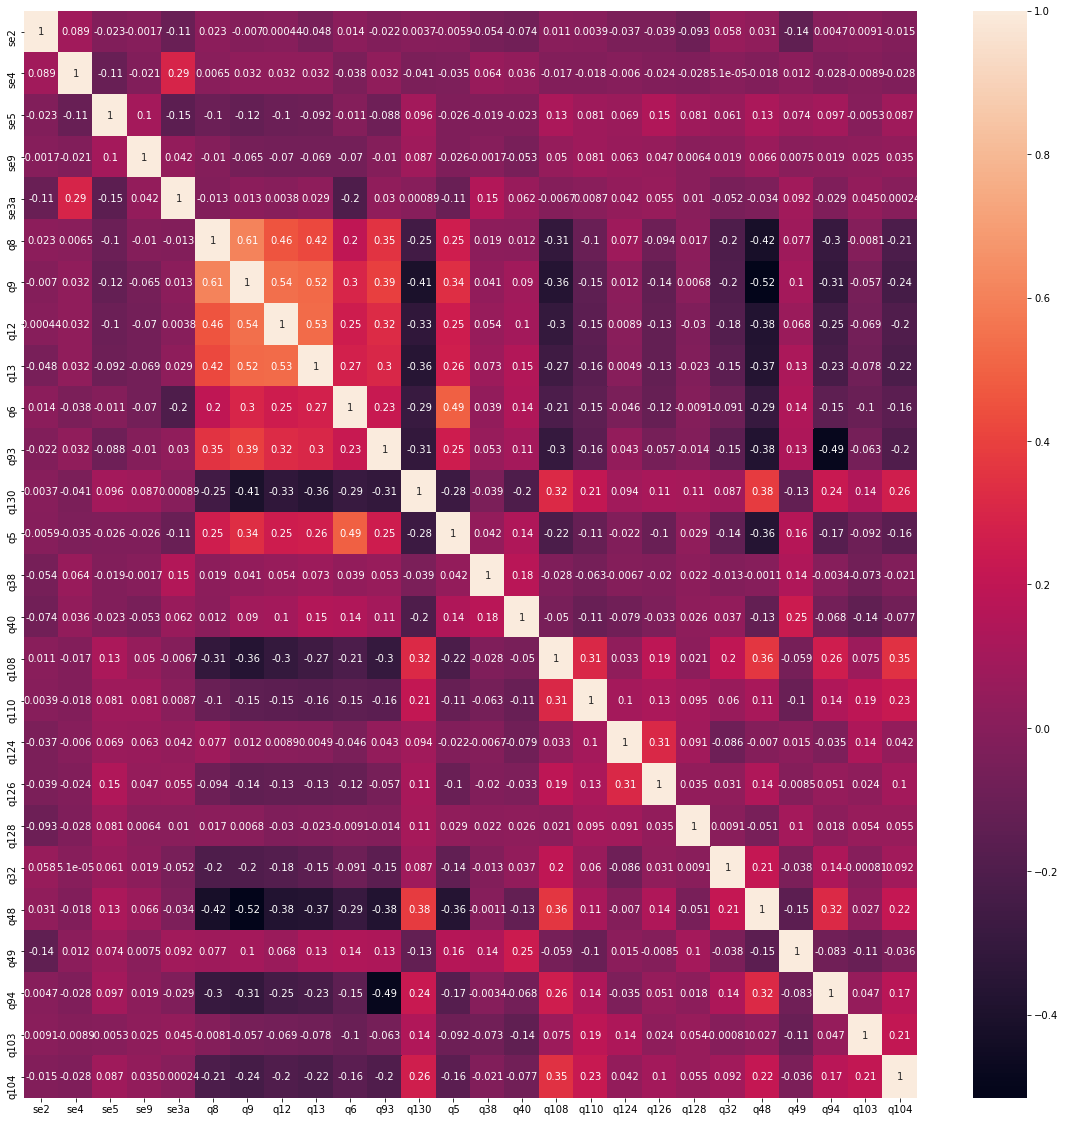

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(mat[columns].corr(),annot=True)

In [8]:
mat.to_csv("cleaned_dataset_datathon2021.csv", header=True, index=False)

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from joblib import dump, load

In [10]:
X_col = "se2,se4,se5,se9,se3a".split(",")
y_col = "q8,q9,q12,q13,q6,q93,q130,q5,q38,q40,q108,q110,q124,q126,q128,q32,q48,q49,q94,q103,q104".split(",")

Trying Linear SVM tolerance 1e-8, Predicting q8

In [11]:
print(mat.shape)
for i, question in enumerate(y_col):
    X_train, X_test, y_train, y_test  = train_test_split(np.asanyarray(mat[X_col].values), np.asanyarray(mat[question].values))

    LinSVM = SVC(kernel="linear", tol=1e-8)
    LinSVM.fit(X_train, y_train)
    print("score {}: ".format(question), LinSVM.score(X_test, y_test))
    dump(LinSVM, 'LinearSVM_{}.joblib'.format(question))

(7186, 27)
score q8:  0.4129104062326099
score q9:  0.4279354479688369
score q12:  0.5141903171953256
score q13:  0.5052865887590429
score q6:  0.434613244296049
score q93:  0.5525876460767947
score q130:  0.4769059543683918
score q5:  0.335559265442404
score q38:  0.8408458542014469
score q40:  0.6872565386755703
score q108:  0.41903171953255425
score q110:  0.47189760712298273
score q124:  0.4852531997774068
score q126:  0.4974958263772955
score q128:  0.4958263772954925
score q32:  0.6622148024485254
score q48:  0.4067890929326656
score q49:  0.4073455759599332
score q94:  0.5358931552587646
score q103:  0.46188091263216474
score q104:  0.43628269337785197


Number of people who voted in the last elections (1 - yes, 2 - no)

In [12]:
mat["q38"].value_counts()

2.0    5977
1.0    1209
Name: q38, dtype: int64

In [13]:
df[mask].fillna(0).groupby("country").count()["q118"]

country
Indonesia      1010
Japan           649
Korea           644
Malaysia        612
Mongolia        856
Philippines     695
Singapore       748
Taiwan          695
Thailand        622
Vietnam         655
Name: q118, dtype: int64

In [14]:
mask_q38=(df_raw["q38"] == 1) | (df_raw["q38"] == 2) 
mat = df_raw[mask_q38]
mat = mat[(~df_raw[X_col].isnull()).any(axis=1)][X_col + ["country","q38"]].dropna()
print(mat.shape)
for name in [x[1] for x in countries]:
    question = "q38"
    mask_countries = (mat['country'] == name)
    if mask_countries.sum() == 0:
        continue
    X_train, X_test, y_train, y_test  = train_test_split(np.asanyarray(mat[X_col][mask_countries].values), np.asanyarray(mat[question][mask_countries].values))
    print("Model for {}".format(name))
    print("{} datapoints".format(mask_countries.sum()))
    LinSVMCountry = SVC(kernel="linear", tol=1e-8)
    LinSVMCountry.fit(X_train, y_train)
    print("score {}: ".format(question), LinSVMCountry.score(X_test, y_test))
    dump(LinSVMCountry, 'LinearSVM{}_{}.joblib'.format(name,question))

(13062, 7)
Model for Japan
1043 datapoints
score q38:  0.8467432950191571
Model for Hong Kong
459 datapoints
score q38:  0.782608695652174
Model for Korea
1115 datapoints
score q38:  0.7275985663082437
Model for China
431 datapoints


/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


score q38:  0.7962962962962963
Model for Mongolia
1145 datapoints
score q38:  0.8885017421602788
Model for Philippines
1179 datapoints
score q38:  0.8271186440677966
Model for Taiwan
1512 datapoints
score q38:  0.8994708994708994
Model for Thailand
1489 datapoints
score q38:  0.8847184986595175
Model for Indonesia
1573 datapoints
score q38:  0.9187817258883249
Model for Singapore
958 datapoints
score q38:  0.65
Model for Vietnam
1195 datapoints
score q38:  0.8762541806020067
Model for Malaysia
963 datapoints
score q38:  0.7468879668049793


In [15]:
print("Countries by perception of corruption at national level")
ranking_nat_corr = df_raw[mask_q38][(df_raw[mask_q38]["q118"] >= 1.0) & (df_raw[mask_q38]["q118"] <= 4.0)].fillna(0).groupby("country").mean()[["q118"]].sort_values(by="q118")
corruption_national = ranking_nat_corr.index
ranking_nat_corr

Countries by perception of corruption at national level


,q118
country,
Mongolia,1.953153
Philippines,2.168468
Taiwan,2.249808
Korea,2.425212
Indonesia,2.431060
Malaysia,2.478210
Japan,2.529787
Thailand,2.775930
Vietnam,2.923395


In [16]:
print("Countries by perception of corruption at local level")
ranking_loc_corr = df_raw[mask_q38][(df_raw[mask_q38]["q117"] >= 1.0) & (df_raw[mask_q38]["q117"] <= 4.0)].fillna(0).groupby("country").mean()[["q117"]].sort_values(by="q117")
corruption_national = ranking_loc_corr.index
ranking_loc_corr

Countries by perception of corruption at local level


,q117
country,
Taiwan,2.302895
Philippines,2.347435
Malaysia,2.501738
Korea,2.515066
Mongolia,2.519352
Japan,2.571280
China,2.579648
Indonesia,2.652142
Thailand,3.026087


Singapore is not included at a local level since it is perceived as a whole

In [17]:
cpi_data = pd.read_csv("CPI-Archive-2008-2.csv")
cpi_data

,country,iso,region,score,rank,interval
0,Afghanistan,AFG,AP,1.5,176,1.1 - 1.6
1,Albania,ALB,ECA,3.4,85,3.3 - 3.4
2,Algeria,DZA,MENA,3.2,92,2.9 - 3.4
3,Angola,AGO,SSA,1.9,158,1.5 - 2.2
4,Argentina,ARG,AME,2.9,109,2.5 - 3.3
...,...,...,...,...,...,...
175,Venezuela,VEN,AME,1.9,158,1.8 - 2.0
176,Vietnam,VNM,AP,2.7,121,2.4 - 3.1
177,Yemen,YEM,MENA,2.3,141,1.5 - 2.2
178,Zambia,ZMB,SSA,2.8,115,2.5 - 3.0


Corrupt vs non-corrupt countries

In [18]:
temp_str = "Mongolia,Taiwan,Philippines,Indonesia,south,Malaysia,Japan,Thailand,Vietnam,Singapore"
official_ranking = cpi_data[cpi_data["country"].apply(lambda x: x.lower().split()[-1] in temp_str.lower())].sort_values(by="rank")
print(official_ranking)
non_corrupt = official_ranking.iloc[:5,:]["country"]
corrupt = official_ranking.iloc[5:,:]["country"]
print("NON CORRUPT")
print(non_corrupt)
print("CORRUPT COUNTRIES")
print(corrupt)

          country  iso region  score  rank   interval
142     Singapore  SGP     AP    9.2     4  9.0 - 9.3
78          Japan  JPN     AP    7.3    18  7.0 - 7.6
156        Taiwan  TWN     AP    5.7    39  5.4 - 6.0
82   Korea, South  KOR     AP    5.6    40  5.1 - 6.3
97       Malaysia  MYS     AP    5.1    47  4.5 - 5.7
159      Thailand  THA     AP    3.5    80  3.0 - 3.9
105      Mongolia  MNG     AP    3.0   102  2.6 - 3.3
176       Vietnam  VNM     AP    2.7   121  2.4 - 3.1
71      Indonesia  IDN     AP    2.6   126  2.3 - 2.9
125   Philippines  PHL     AP    2.3   141  2.1 - 2.5
NON CORRUPT
142       Singapore
78            Japan
156          Taiwan
82     Korea, South
97         Malaysia
Name: country, dtype: object
CORRUPT COUNTRIES
159       Thailand
105       Mongolia
176        Vietnam
71       Indonesia
125    Philippines
Name: country, dtype: object


Creating two SVM models, one for corrupt countries and one for non-corrupt countries

In [19]:
question = "q38"
mask_countries = (mat['country'] == "Korea") | (mat['country'] == "Singapore") | (mat['country'] == "Japan") | (mat['country'] == "Taiwan") | (mat['country'] == "Malaysia")
X_train, X_test, y_train, y_test  = train_test_split(np.asanyarray(mat[X_col][mask_countries].values), np.asanyarray(mat[question][mask_countries].values))
print("NON Corrupt countries model")
print("{} datapoints".format(mask_countries.sum()))
LinSVM1 = SVC(kernel="linear", tol=1e-8)
LinSVM1.fit(X_train, y_train)
print("score {}: ".format(question), LinSVM1.score(X_test, y_test))
dump(LinSVM1, 'NON_Corrupt_LinearSVM_{}.joblib'.format(question))

NON Corrupt countries model
5591 datapoints
score q38:  0.7875536480686696


['NON_Corrupt_LinearSVM_q38.joblib']

In [20]:
question = "q38"
mask_countries = (mat['country'] == "Korea") | (mat['country'] == "Singapore") | (mat['country'] == "Japan") | (mat['country'] == "Taiwan") | (mat['country'] == "Malaysia")
X_train, X_test, y_train, y_test  = train_test_split(np.asanyarray(mat[X_col][~mask_countries].values), np.asanyarray(mat[question][~mask_countries].values))
print("Corrupt countries model")
print("{} datapoints".format((~mask_countries).sum()))
LinSVM1 = SVC(kernel="linear", tol=1e-8)
LinSVM1.fit(X_train, y_train)
print("score {}: ".format(question), LinSVM1.score(X_test, y_test))
dump(LinSVM1, 'Corrupt_LinearSVM_{}.joblib'.format(question))

Corrupt countries model
7471 datapoints
score q38:  0.8752676659528907


['Corrupt_LinearSVM_q38.joblib']

In [21]:
df_w1, meta = pyreadstat.read_sav("W1 Merged Data/Wave.1_Data/Merge/Wave1_20170906.sav")

In [22]:
X_colW1 = "se002,se004,se005,se009,se003a".split(",")
df_w1 = df_w1[X_colW1 + ["country", "q027"]]
for idc, country  in countries:
    df_w1["country"][df_w1["country"] == idc] = country
print(df_w1.shape)
df_w1 = df_w1.dropna()
print(df_w1.shape)

(12217, 7)
(6554, 7)


In [23]:
df_w1 = df_w1.rename(
    columns = {"se002":"se2",
     "se004":"se4",
     "se005":"se5",
     "se009":"se9",
     "se003a":"se3a",
     "q027":"q38"
    }
)
df_w1.head()

,se2,se4,se5,se9,se3a,country,q38
3183,1.0,1.0,7.0,3.0,39.0,Hong Kong,2.0
3185,1.0,1.0,9.0,5.0,33.0,Hong Kong,2.0
3188,2.0,1.0,5.0,3.0,47.0,Hong Kong,1.0
3191,1.0,1.0,9.0,5.0,39.0,Hong Kong,2.0
3192,2.0,1.0,5.0,3.0,26.0,Hong Kong,1.0


In [24]:
mat.head()

,se2,se4,se5,se9,se3a,country,q38
0,2.0,2.0,7.0,5.0,40.0,Japan,1.0
1,2.0,2.0,8.0,1.0,53.0,Japan,2.0
2,2.0,2.0,9.0,5.0,40.0,Japan,2.0
3,2.0,4.0,8.0,2.0,64.0,Japan,2.0
4,1.0,2.0,8.0,3.0,65.0,Japan,2.0


In [25]:
myDataFrame = df_w1.append(mat, ignore_index=True)

In [26]:
question = "q38"
mask_countries = (myDataFrame['country'] == "Korea") | (myDataFrame['country'] == "Singapore") | (myDataFrame['country'] == "Japan") | (myDataFrame['country'] == "Taiwan") | (myDataFrame['country'] == "Malaysia")
X_train, X_test, y_train, y_test  = train_test_split(np.asanyarray(myDataFrame[X_col][mask_countries].values), np.asanyarray(myDataFrame[question][mask_countries].values))
print("NON Corrupt countries model")
print("{} datapoints".format(mask_countries.sum()))
LinSVM1 = SVC(kernel="linear", tol=1e-8)
LinSVM1.fit(X_train, y_train)
print("score {}: ".format(question), LinSVM1.score(X_test, y_test))
dump(LinSVM1, 'NON_Corrupt_LinearSVM_{}.joblib'.format(question))

NON Corrupt countries model
9039 datapoints
score q38:  0.8190265486725664


['NON_Corrupt_LinearSVM_q38.joblib']

In [27]:
question = "q38"
mask_countries = (myDataFrame['country'] == "Korea") | (myDataFrame['country'] == "Singapore") | (myDataFrame['country'] == "Japan") | (myDataFrame['country'] == "Taiwan") | (myDataFrame['country'] == "Malaysia")
X_train, X_test, y_train, y_test  = train_test_split(np.asanyarray(myDataFrame[X_col][mask_countries].values), np.asanyarray(myDataFrame[question][mask_countries].values))
print("Corrupt countries model")
print("{} datapoints".format((~mask_countries).sum()))
LinSVM1 = SVC(kernel="linear", tol=1e-8)
LinSVM1.fit(X_train, y_train)
print("score {}: ".format(question), LinSVM1.score(X_test, y_test))
dump(LinSVM1, 'Corrupt_LinearSVM_{}.joblib'.format(question))

Corrupt countries model
10577 datapoints
score q38:  0.8110619469026549


['Corrupt_LinearSVM_q38.joblib']

In [28]:
question = "q38"
X_train, X_test, y_train, y_test  = train_test_split(np.asanyarray(myDataFrame[X_col].values), np.asanyarray(myDataFrame[question].values))
print("All countries model")
print("{} datapoints".format(myDataFrame[X_col].shape[0]))
LinSVM1 = SVC(kernel="linear", tol=1e-8)
LinSVM1.fit(X_train, y_train)
print("score {}: ".format(question), LinSVM1.score(X_test, y_test))
dump(LinSVM1, 'ALL_LinearSVM_{}.joblib'.format(question))

All countries model
19616 datapoints
score q38:  0.841557911908646


['ALL_LinearSVM_q38.joblib']